# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

# Data manipulation and analysis
import pandas as pd
import numpy as np
import math

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    # Your code that triggers warnings

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [4]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object

In [7]:
## market_id, store_primary_category,order_protocol are categorical variables, they need to be converted to object
## created_at and actual_delivery_time need to be converted to datetime format

In [8]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [9]:
df.shape

(175777, 14)

In [10]:
## Also, we saw above in df.describe() that min_item_price, total_onshift_dashers,total_busy_dashers and total_outstanding_orders
## have negative values as well, since these values can't be negative, removing these from datasets.
cols_to_check = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

# Keep only rows where all specified columns have non-negative values
df = df[(df[cols_to_check] >= 0).all(axis=1)]


In [11]:
df.shape

(175687, 14)

In [12]:
## 90 records dropped because of negative values in min_item_price, total_onshift_dashers,total_busy_dashers and total_outstanding_orders

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [13]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('object')
df['store_primary_category'] = df['store_primary_category'].astype('object')
df['order_protocol'] = df['order_protocol'].astype('object')



#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [14]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [15]:
# Extract the hour and day of week from the 'created_at' timestamp

# Extract hour
df['hour'] = df['created_at'].dt.hour

# Extract day of week (Monday=0, Sunday=6)
df['dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.dayofweek >= 5
df['isWeekend'] = df['isWeekend'].map({True: 1, False: 0})



In [16]:
# Drop unnecessary columns
## dropping created_at,actual_delivery_time
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)


In [17]:
df

market_id store_primary_category order_protocol  total_items  subtotal  \
0            1.0                      4            1.0            4      3441   
1            2.0                     46            2.0            1      1900   
2            2.0                     36            3.0            4      4771   
3            1.0                     38            1.0            1      1525   
4            1.0                     38            1.0            2      3620   
...          ...                    ...            ...          ...       ...   
175772       1.0                     28            4.0            3      1389   
175773       1.0                     28            4.0            6      3010   
175774       1.0                     28            4.0            5      1836   
175775       1.0                     58            1.0            1      1175   
175776       1.0                     58            1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  time_taken  hour  dayofweek  isWeekend  
0          34.44        47.0    22          4          0  
1          27.60        44.0    21          1          0  
2          11.56        55.0     0          0          0  
3          31.80        59.0     3          3          0  
4           8.20        46.0     2          1          0  
...          ...         ...   ...        ...        ...  
175772     13.24        43.0     0          1          0  
175773     36.60        62.0     0          4          0  
175774     31.80        46.0     4          5          1  
175775     15.36        45.0    18          6          1  
175776      5.36        37.0    19          6          1  

[175687 rows x 16 columns]

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [18]:
features = [
    'market_id',
    'store_primary_category',
    'order_protocol',
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'hour',
    'dayofweek',
    'isWeekend'
]
target_variable = 'time_taken'

In [19]:
# Define target variable (y) and features (X)

y= df[target_variable]
X= df[features]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [20]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

In [21]:
df_train= pd.concat([X_train, y_train], axis=1)

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [22]:
# Define numerical and categorical columns for easy EDA and data manipulation


# Categorical columns (object or categorical)
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'hour', 'dayofweek']

# Numerical columns (int, float)
num_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance'
]


# target_variable = 'time_taken' is a numerical column

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

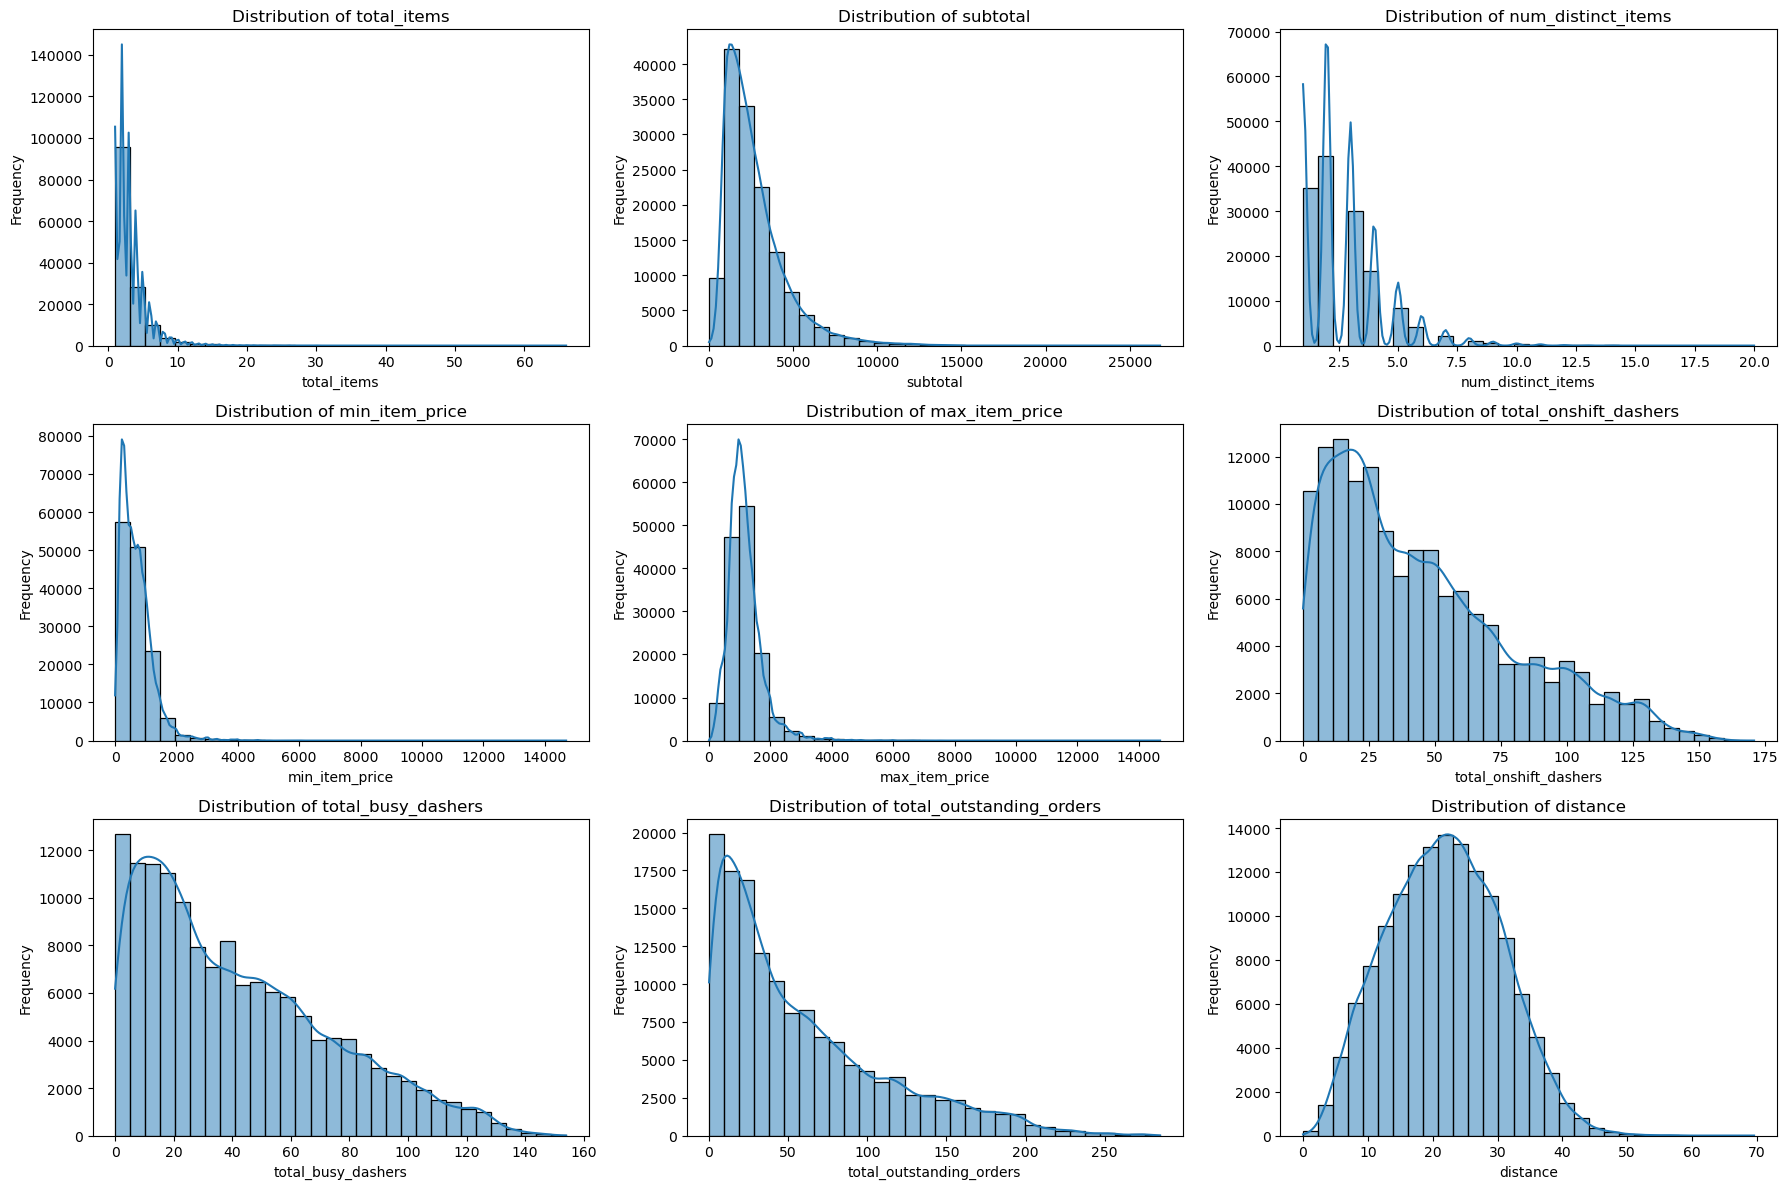

In [23]:
# Plot distributions for all numerical columns

n_cols = 3
n_plots = len(num_cols)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(X_train[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove extra axes
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

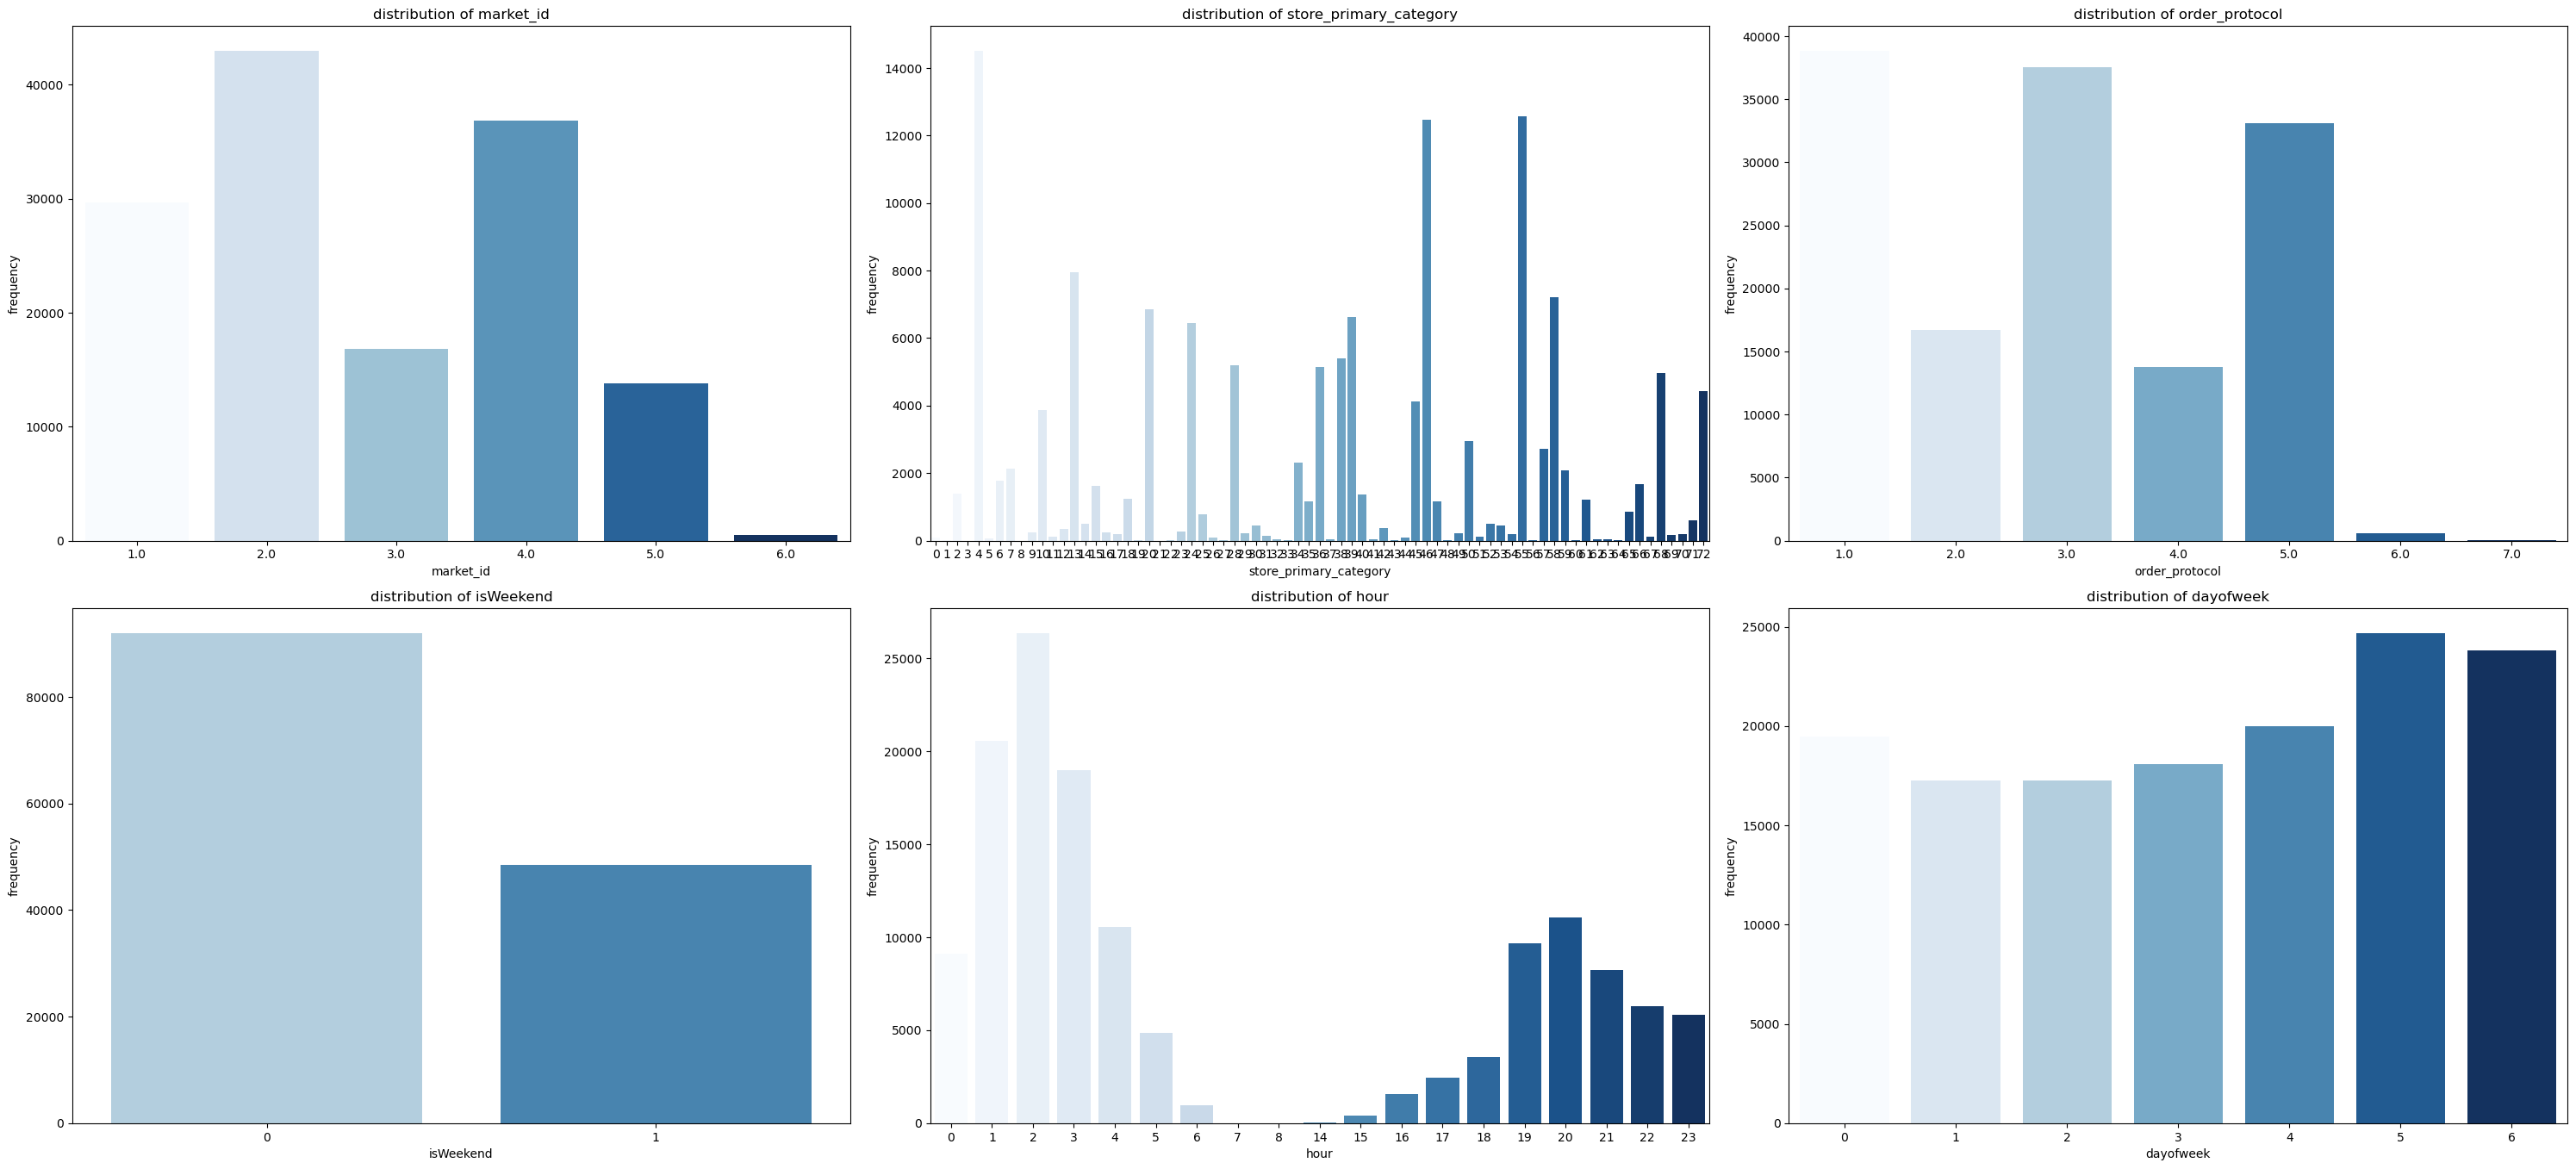

In [24]:

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_train, x=col, hue=col, palette='Blues', legend=False)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

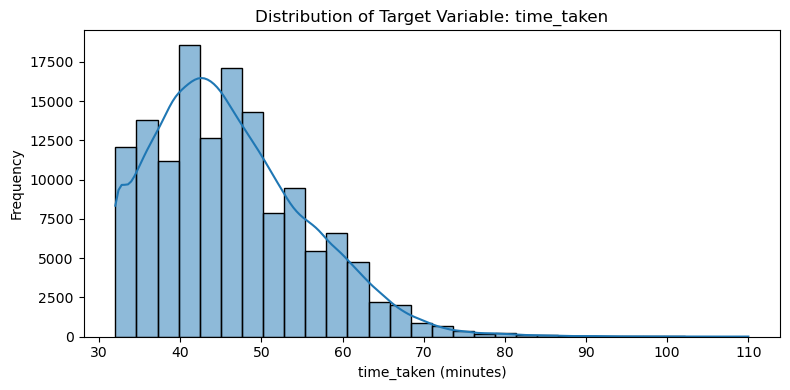

In [25]:
# Distribution of time_taken
plt.figure(figsize=(8, 4))
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Target Variable: time_taken')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

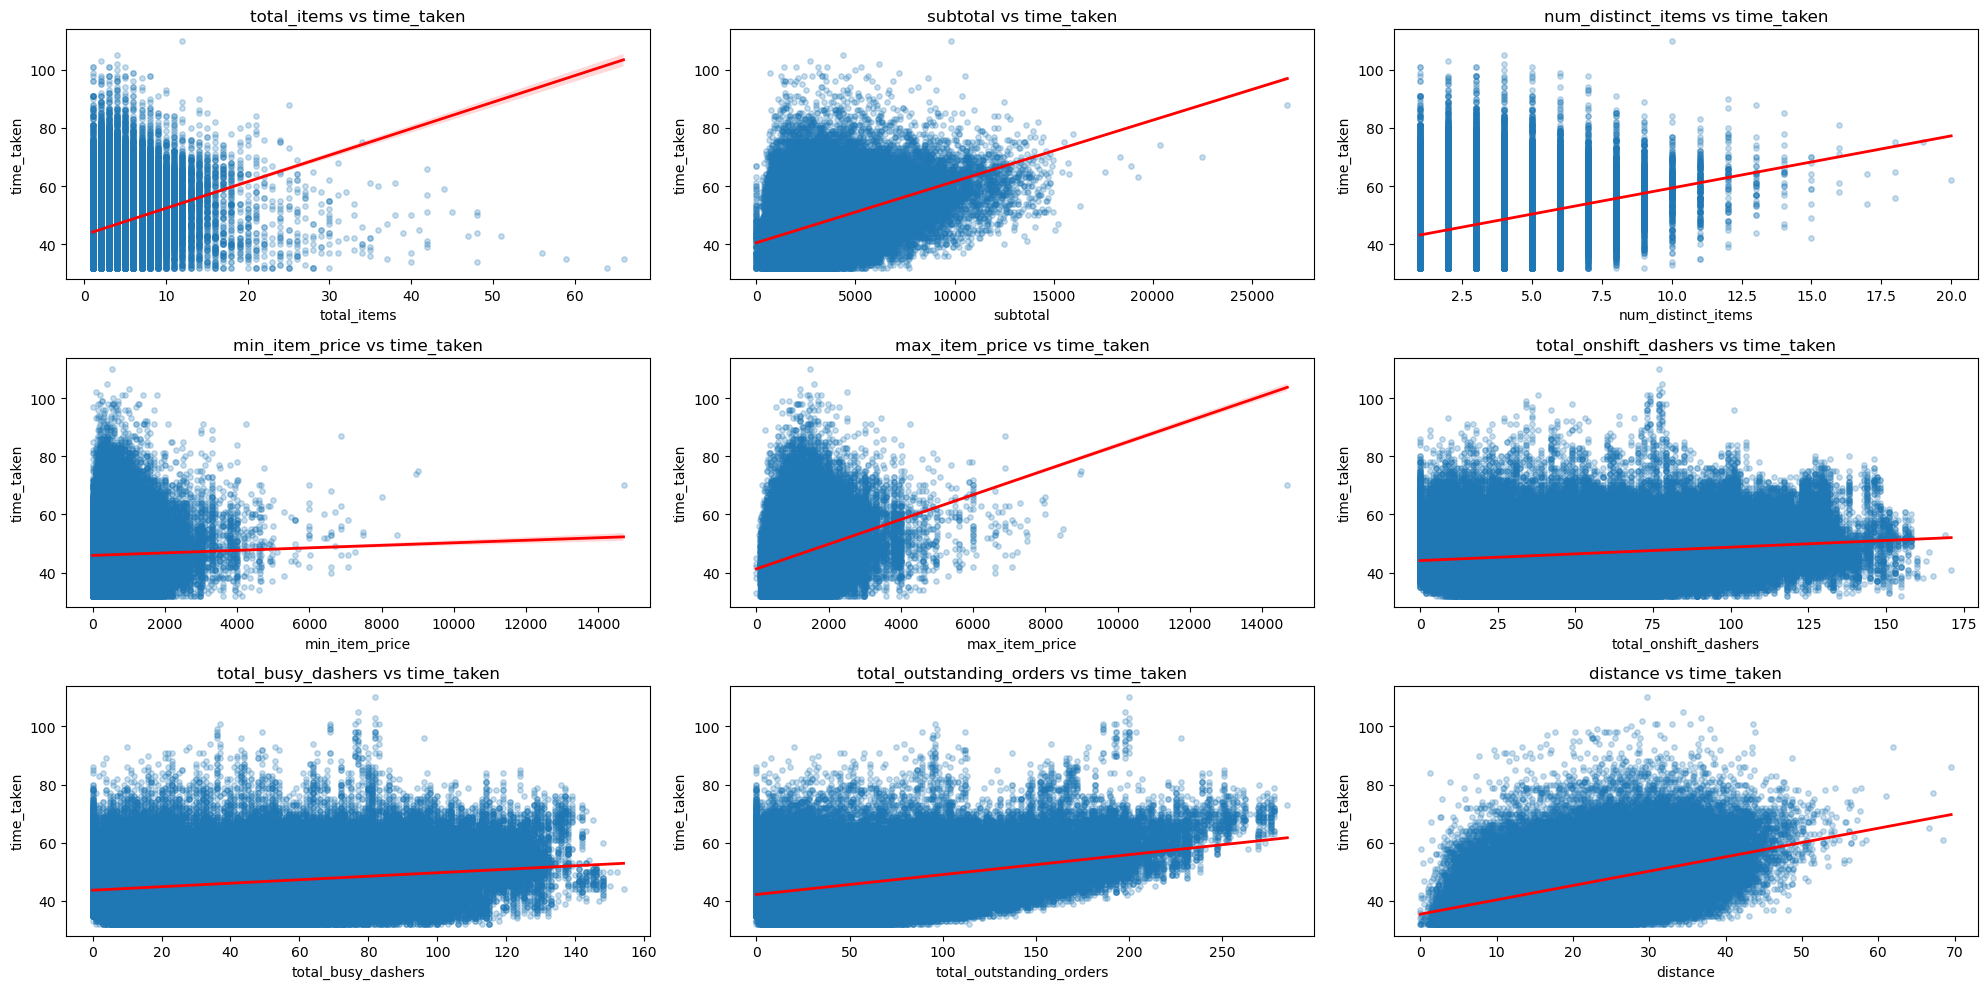

In [26]:

plt.figure(figsize = (20,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_train[col],y = y_train)
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

In [27]:
# Delivery time increases with total items, distinct items, order value, outstanding orders, and distance. Dasher availability shows weak 
# impact. Item prices have minimal effect. Operational load and distance are the strongest predictors of delivery delay.


In [28]:
## Visualizing the relationship of different categorical variables with target variable

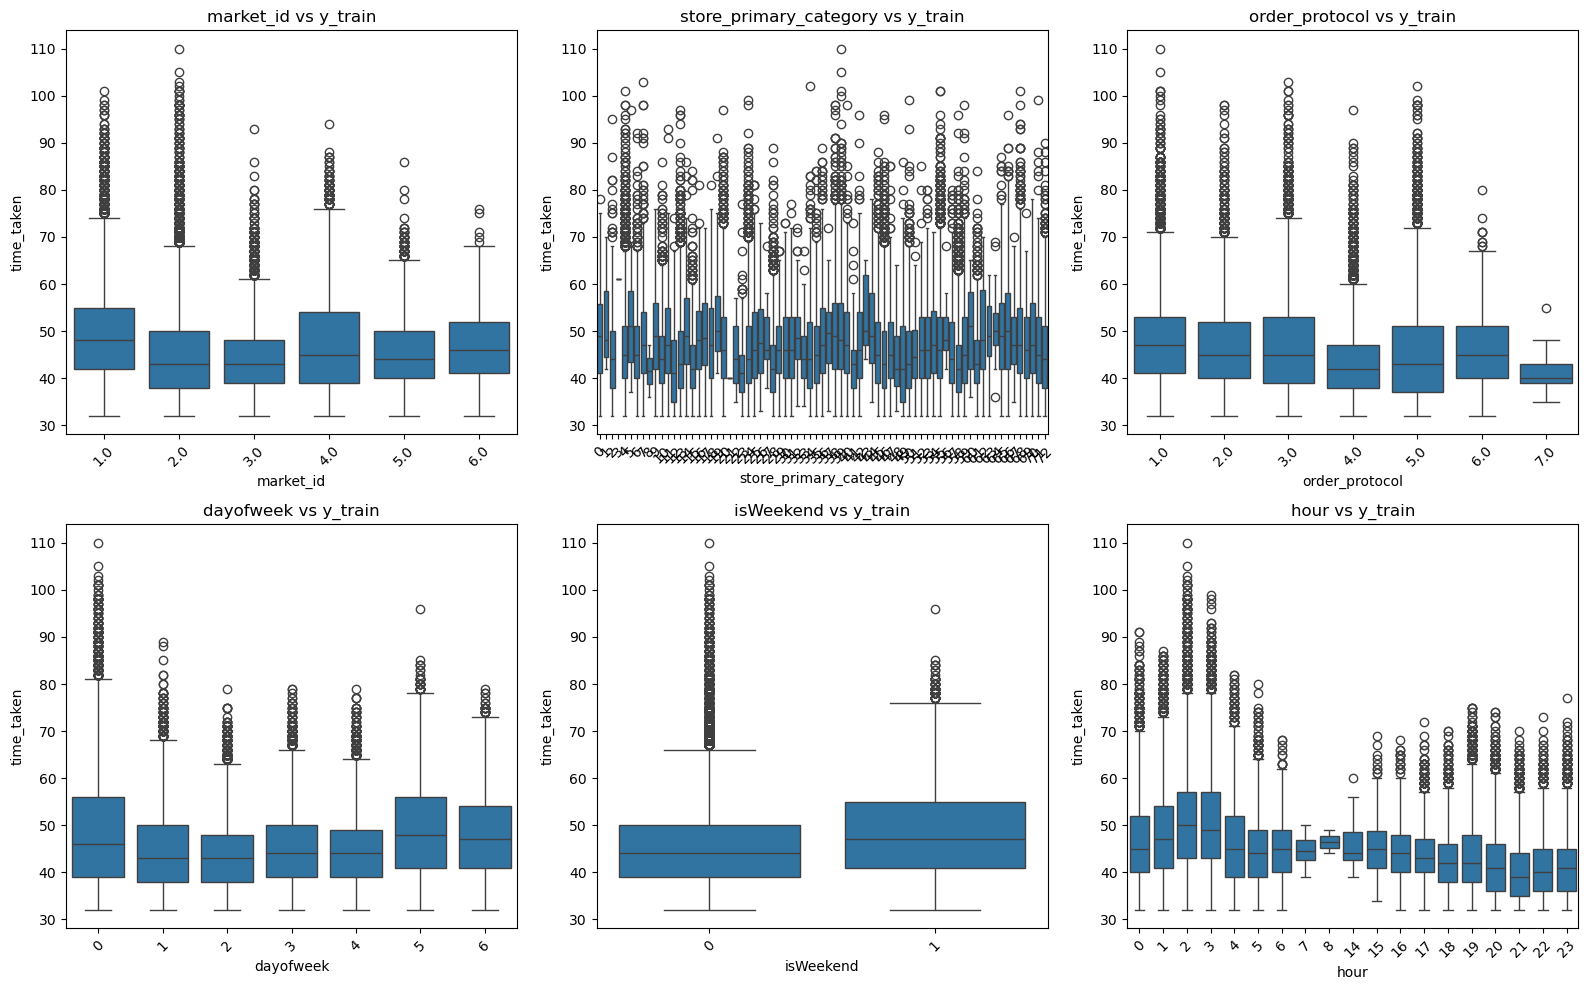

In [29]:
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'dayofweek', 'isWeekend', 'hour']
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_train, x=col, y='time_taken')
    plt.title(f'{col} vs y_train')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# order_protocol, isWeekend, and possibly market_id show variation in time_taken, indicating a relationship. dayofweek can be ignored due 
# to isWeekend feature engineering. store_primary_category shows minimal distinction

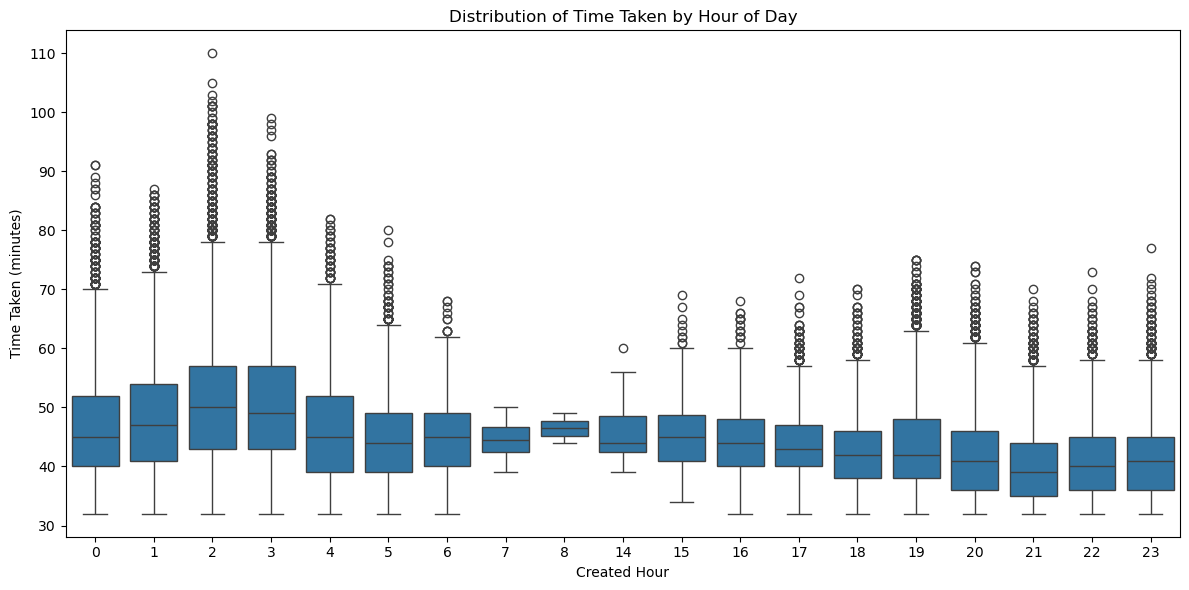

In [31]:
# Show the distribution of time_taken for different hours


plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train, x='hour', y=y_train)
plt.title('Distribution of Time Taken by Hour of Day')
plt.xlabel('Created Hour')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# The boxplot shows how time_taken varies by hour of the day. Delivery times tend to be higher and more variable during 
# early morning hours (0–6 AM), with a larger number of outliers and a higher median. In contrast,midday to 
# evening hours (2PM–8 PM) exhibit lower median delivery times and less variability.

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

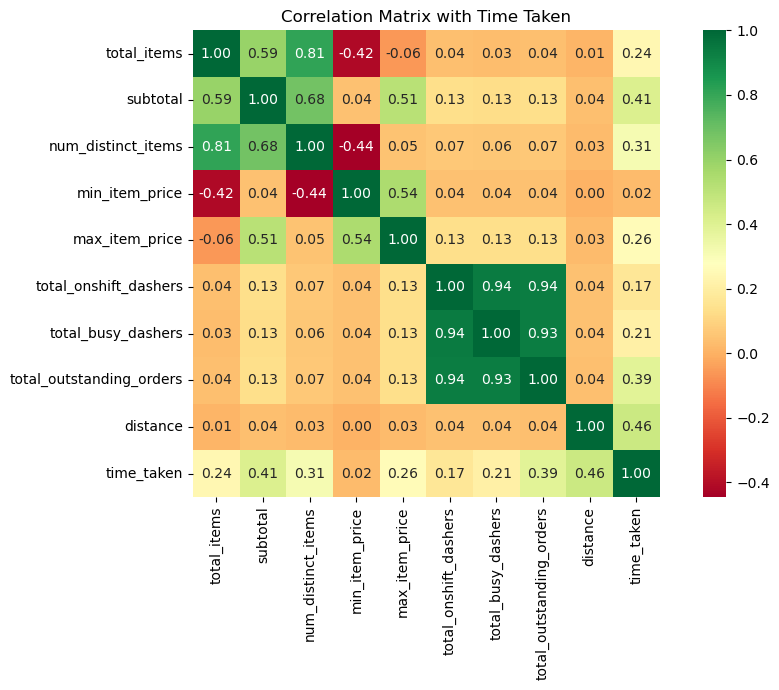

In [33]:
# Plot the heatmap of the correlation matrix
# Compute correlation matrix
df_train= pd.concat([X_train, y_train], axis=1)
corr_matrix = df_train[num_cols + ['time_taken']].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdYlGn', square=True)
plt.title('Correlation Matrix with Time Taken')
plt.tight_layout()
plt.show()


In [34]:
# The correlation matrix shows that distance (0.46), subtotal (0.41), and total_outstanding_orders (0.39) are moderately correlated with 
# time_taken. Item prices and dasher counts have weak or negligible influence on delivery duration.

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [35]:
df_train 

market_id store_primary_category order_protocol  total_items  subtotal  \
110609       4.0                     46            3.0            6      2980   
171156       3.0                     55            3.0            2      3998   
141352       2.0                     46            5.0            1       699   
37170        1.0                     55            1.0            1       894   
80311        2.0                     36            3.0            5      2785   
...          ...                    ...            ...          ...       ...   
119940       2.0                     58            5.0            1      1098   
103745       4.0                     36            5.0            2      1250   
132000       3.0                     10            2.0            9      3650   
146938       1.0                     55            5.0            1      1195   
122021       1.0                     10            3.0            1       895   

        num_distinct_items  min_item_price  max_item_price  \
110609                   3             150             595   
171156                   2             999             999   
141352                   1             699             699   
37170                    1             695             695   
80311                    4             300             795   
...                    ...             ...             ...   
119940                   1             999             999   
103745                   2             325             925   
132000                   4             225             625   
146938                   1             995             995   
122021                   1             895             895   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
110609                   49.0                49.0                      87.0   
171156                   42.0                35.0                      36.0   
141352                   86.0                82.0                     106.0   
37170                    53.0                55.0                      56.0   
80311                    44.0                34.0                      40.0   
...                       ...                 ...                       ...   
119940                   36.0                35.0                      37.0   
103745                   71.0                98.0                      95.0   
132000                   14.0                14.0                      14.0   
146938                    3.0                 3.0                       7.0   
122021                   23.0                23.0                      37.0   

        distance  hour  dayofweek  isWeekend  time_taken  
110609     23.12     2          0          0        58.0  
171156     25.00     1          4          0        42.0  
141352     14.92     1          5          1        37.0  
37170      35.40     0          6          1        51.0  
80311      25.04     1          4          0        41.0  
...          ...   ...        ...        ...         ...  
119940     23.72    20          0          0        33.0  
103745     24.08     1          0          0        37.0  
132000     20.24    22          5          1        44.0  
146938      6.72     3          1          0        43.0  
122021     10.56    20          6          1        41.0  

[140549 rows x 16 columns]

In [36]:
# Drop 3-5 weakly correlated columns from training dataset

df_train = df_train.drop(columns=[
    'min_item_price',
    'store_primary_category',
     'dayofweek'
])

In [37]:
# We dropped min_item_price as it showed weak correlation (0.02), dayofweek can be ignored due 
# to isWeekend feature engineering, store_primary_category shows minimal distinction

In [38]:
df_train

market_id order_protocol  total_items  subtotal  num_distinct_items  \
110609       4.0            3.0            6      2980                   3   
171156       3.0            3.0            2      3998                   2   
141352       2.0            5.0            1       699                   1   
37170        1.0            1.0            1       894                   1   
80311        2.0            3.0            5      2785                   4   
...          ...            ...          ...       ...                 ...   
119940       2.0            5.0            1      1098                   1   
103745       4.0            5.0            2      1250                   2   
132000       3.0            2.0            9      3650                   4   
146938       1.0            5.0            1      1195                   1   
122021       1.0            3.0            1       895                   1   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
110609             595                   49.0                49.0   
171156             999                   42.0                35.0   
141352             699                   86.0                82.0   
37170              695                   53.0                55.0   
80311              795                   44.0                34.0   
...                ...                    ...                 ...   
119940             999                   36.0                35.0   
103745             925                   71.0                98.0   
132000             625                   14.0                14.0   
146938             995                    3.0                 3.0   
122021             895                   23.0                23.0   

        total_outstanding_orders  distance  hour  isWeekend  time_taken  
110609                      87.0     23.12     2          0        58.0  
171156                      36.0     25.00     1          0        42.0  
141352                     106.0     14.92     1          1        37.0  
37170                       56.0     35.40     0          1        51.0  
80311                       40.0     25.04     1          0        41.0  
...                          ...       ...   ...        ...         ...  
119940                      37.0     23.72    20          0        33.0  
103745                      95.0     24.08     1          0        37.0  
132000                      14.0     20.24    22          1        44.0  
146938                       7.0      6.72     3          0        43.0  
122021                      37.0     10.56    20          1        41.0  

[140549 rows x 13 columns]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [39]:
num_cols= ['subtotal',
 'num_distinct_items',
 'total_outstanding_orders',
 'distance',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_items',
 'time_taken']

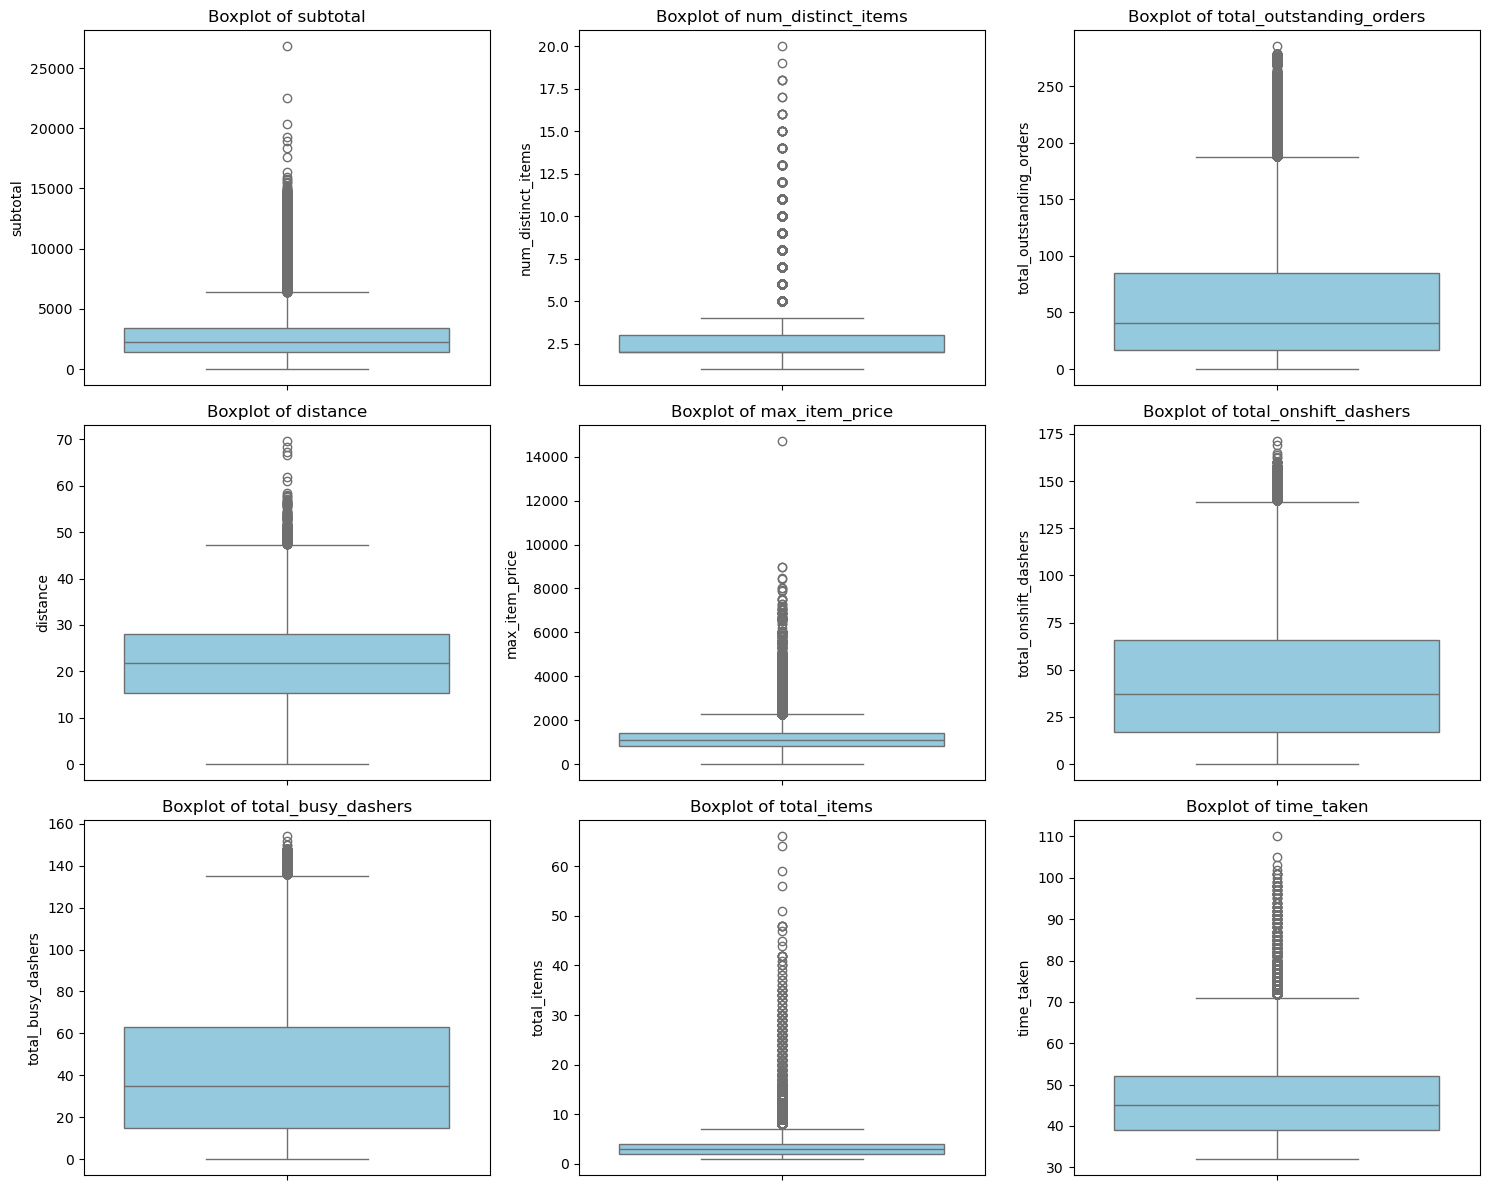

In [40]:
# Boxplot for time_taken

# Set grid size for subplots
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

num_cols
# Set figure size
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Plot each column as a boxplot in a subplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [41]:
df_train.shape

(140549, 13)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [42]:
outlier_caps = {}

# Updated function to compute and store caps (for filtering rows)
def remove_outliers_and_store(df, col, lower_quantile=0.01, upper_quantile=0.99):
    lower = df[col].quantile(lower_quantile)
    upper = df[col].quantile(upper_quantile)
    outlier_caps[col] = {'lower': lower, 'upper': upper}
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Columns to process
cols = ['subtotal', 'num_distinct_items','total_outstanding_orders', 'distance', 'time_taken',  'total_items',   'max_item_price',\
        'total_onshift_dashers', 'total_busy_dashers']



# Apply to training data (removes rows with outliers)
for col in cols:
    df_train = remove_outliers_and_store(df_train, col)



# check shape after filtering
print("Training shape after removing outliers:", df_train.shape)


Training shape after removing outliers: (125906, 13)


In [43]:
# Number of observation in training dataset reduced from 140621 to 125906

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [44]:
# Define numerical and categorical columns for easy EDA and data manipulation


# Categorical columns (object or categorical)
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'hour', 'dayofweek']

# Numerical columns (int, float)
num_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance'
]


# target_variable = 'time_taken' is a numerical column

#### **4.1 Feature Distributions**


In [45]:
df_test= pd.concat([X_test, y_test], axis=1)


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

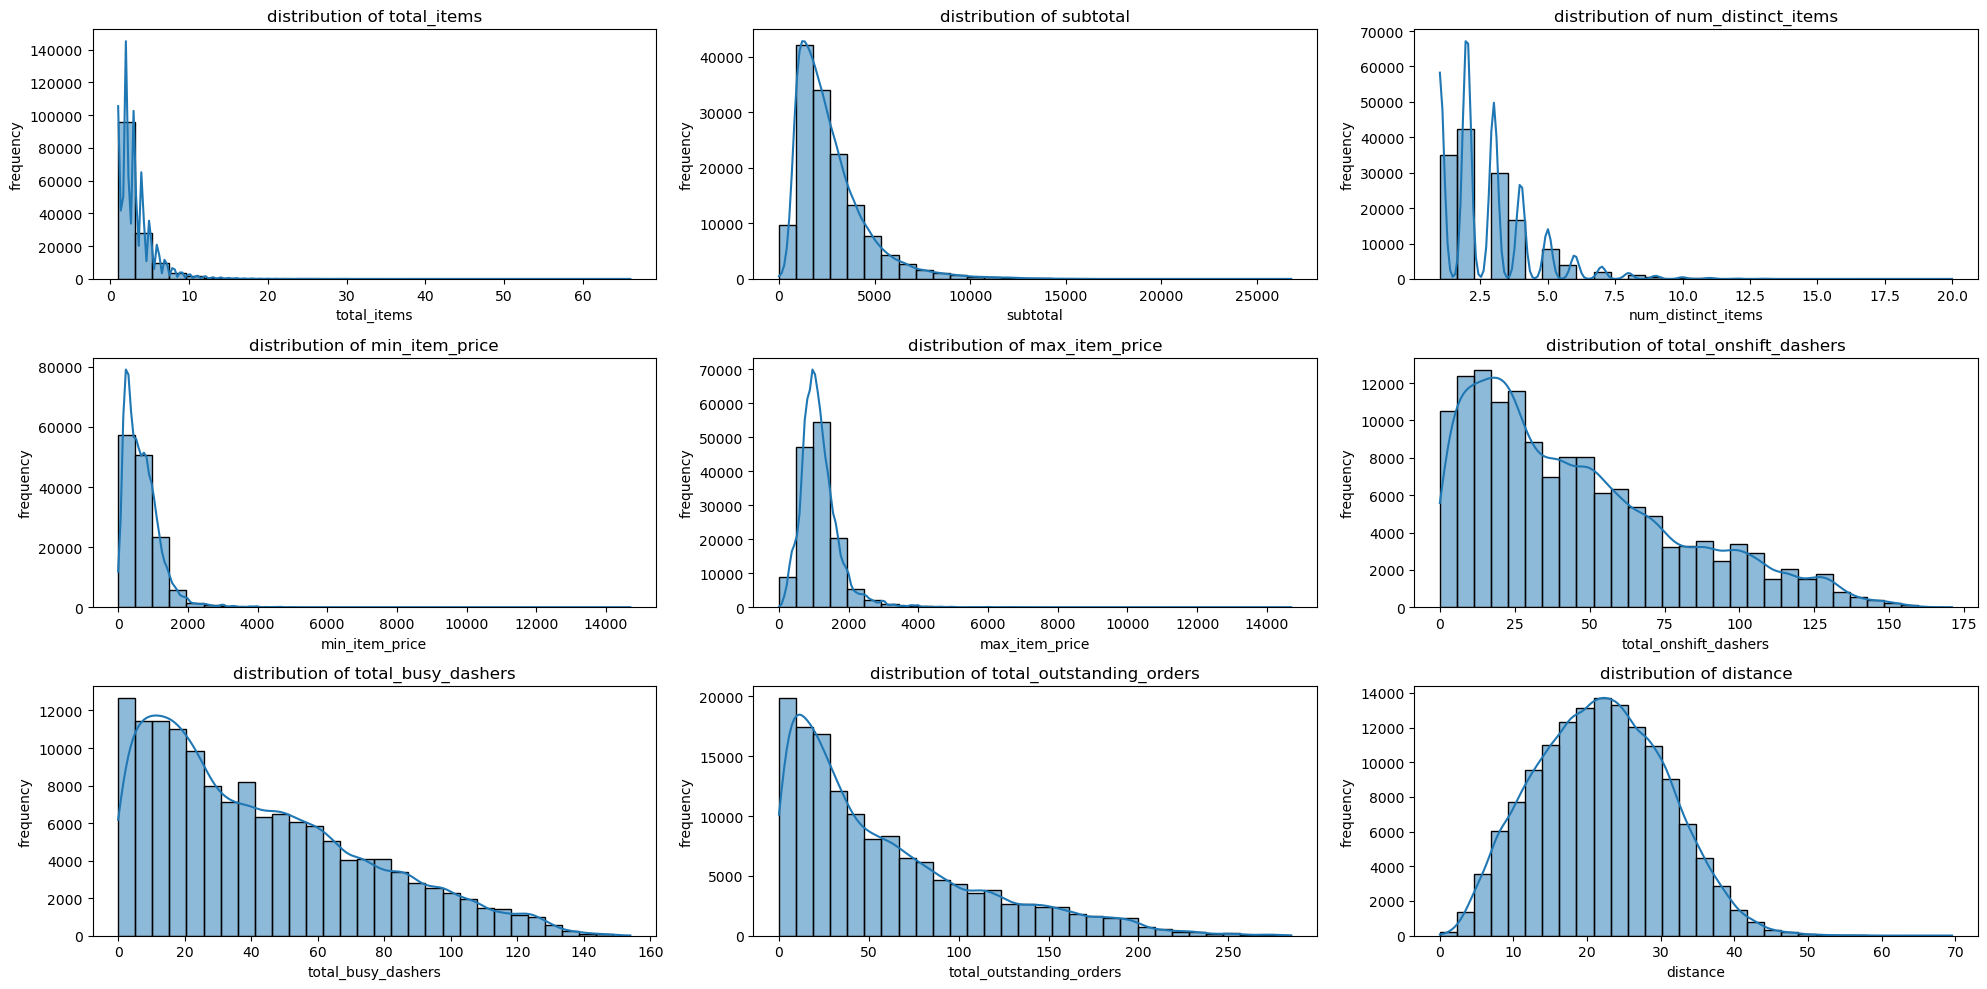

In [46]:
# Plot distributions for all numerical columns

# Categorical columns (object or categorical)
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend', 'hour', 'dayofweek']

# Numerical columns (int, float)
num_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance'
]


# target_variable = 'time_taken' is a numerical column

plt.figure(figsize = (20,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_train[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

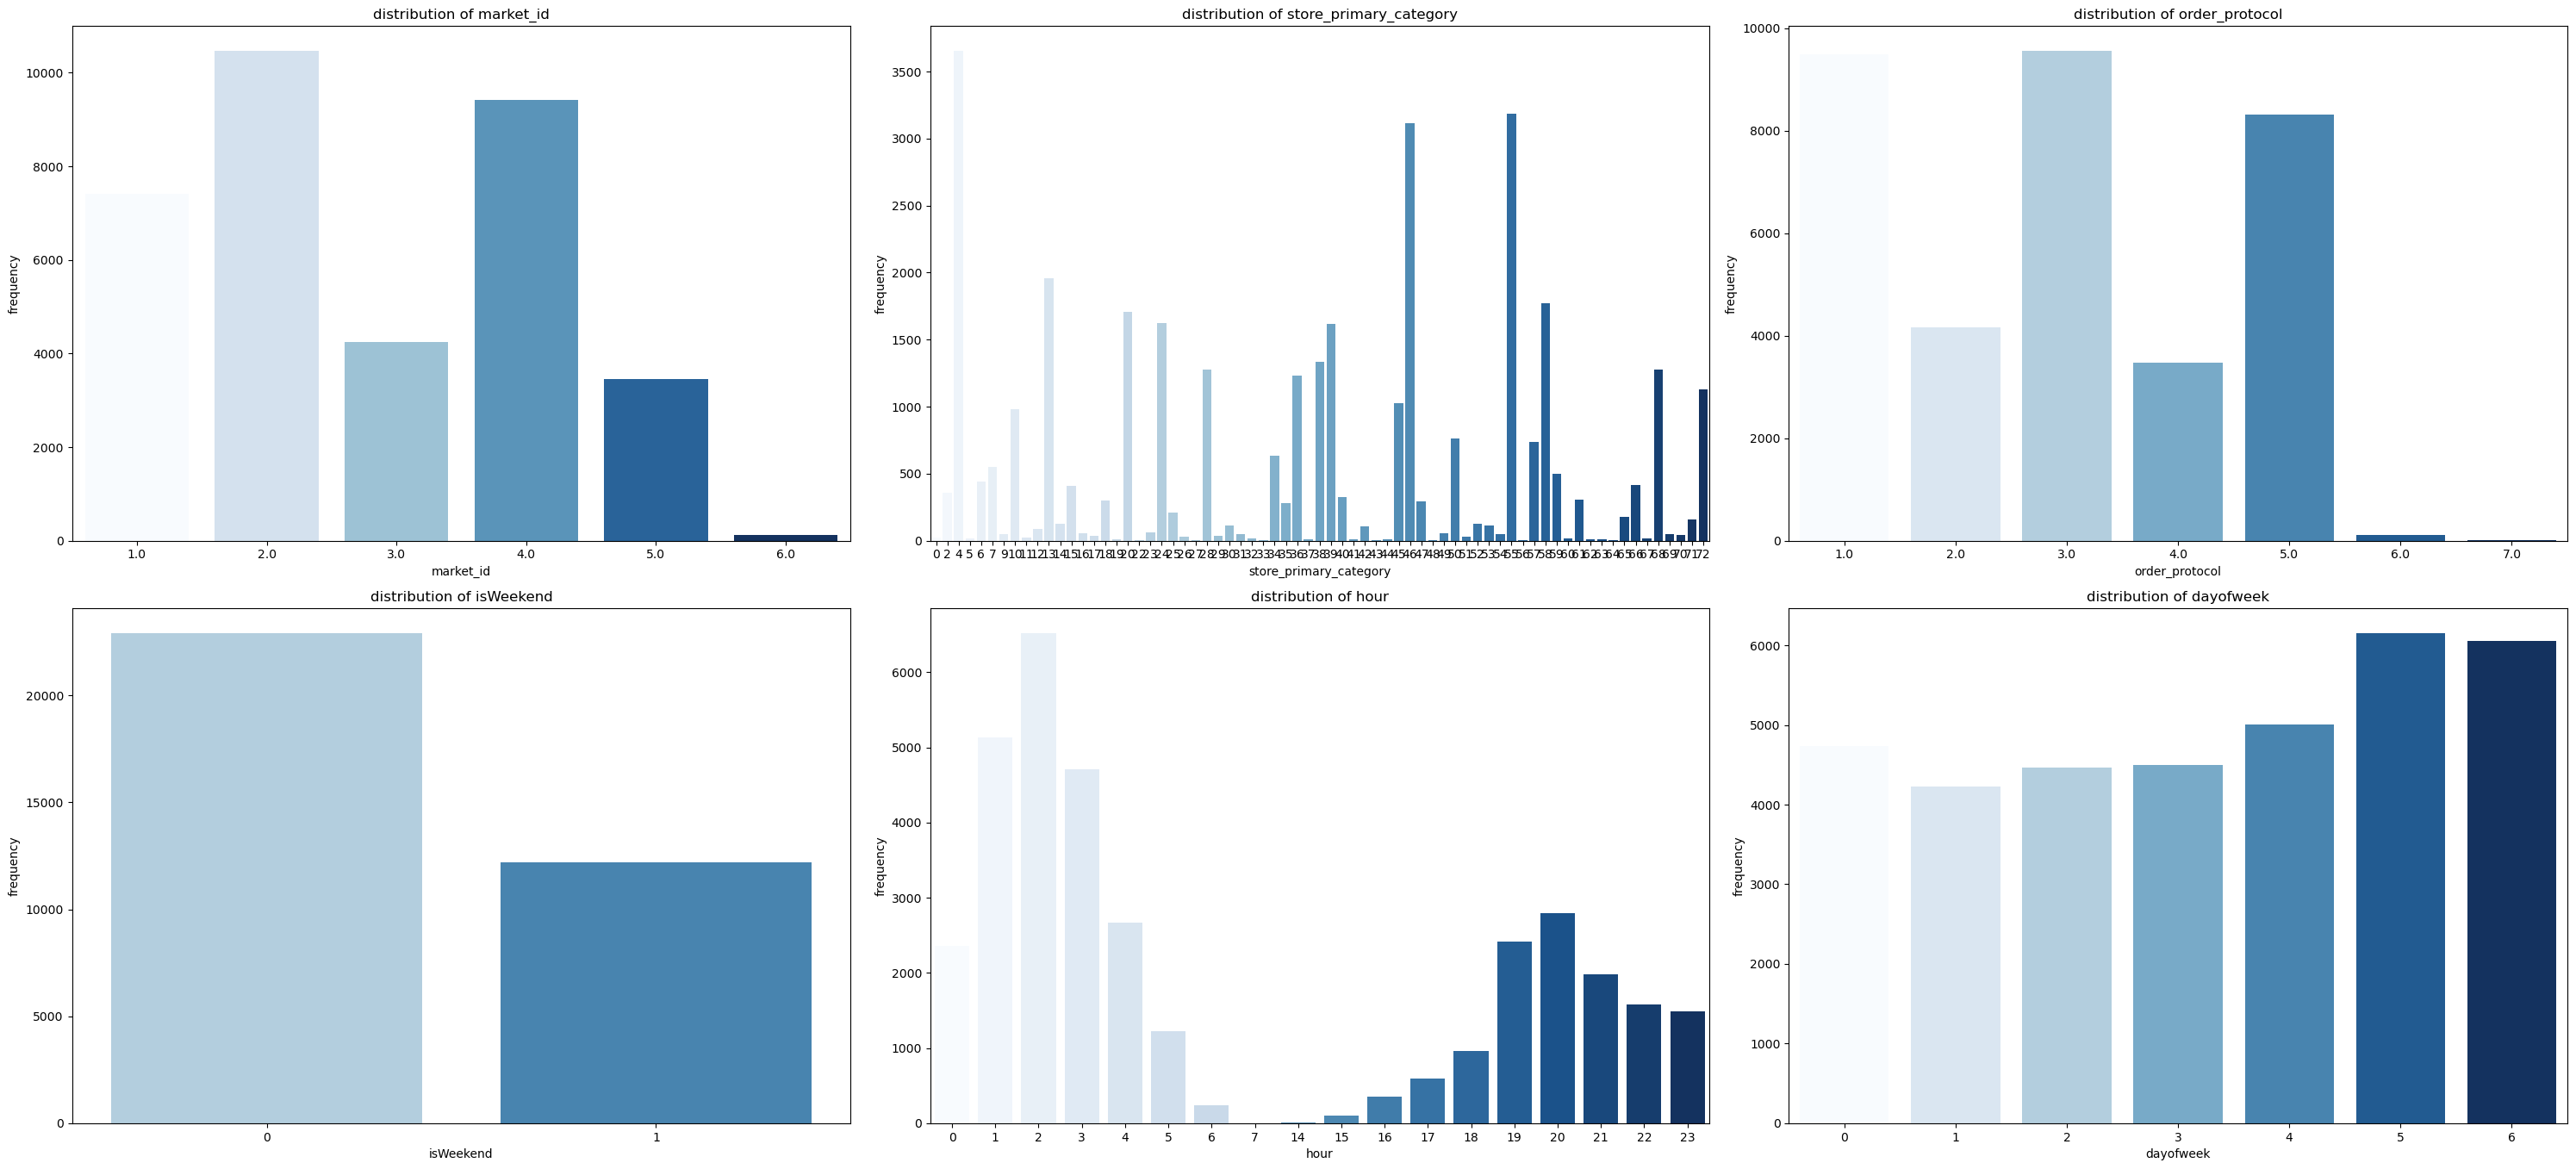

In [47]:
# Distribution of categorical columns

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_test, x=col, hue=col, palette='Blues', legend=False)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

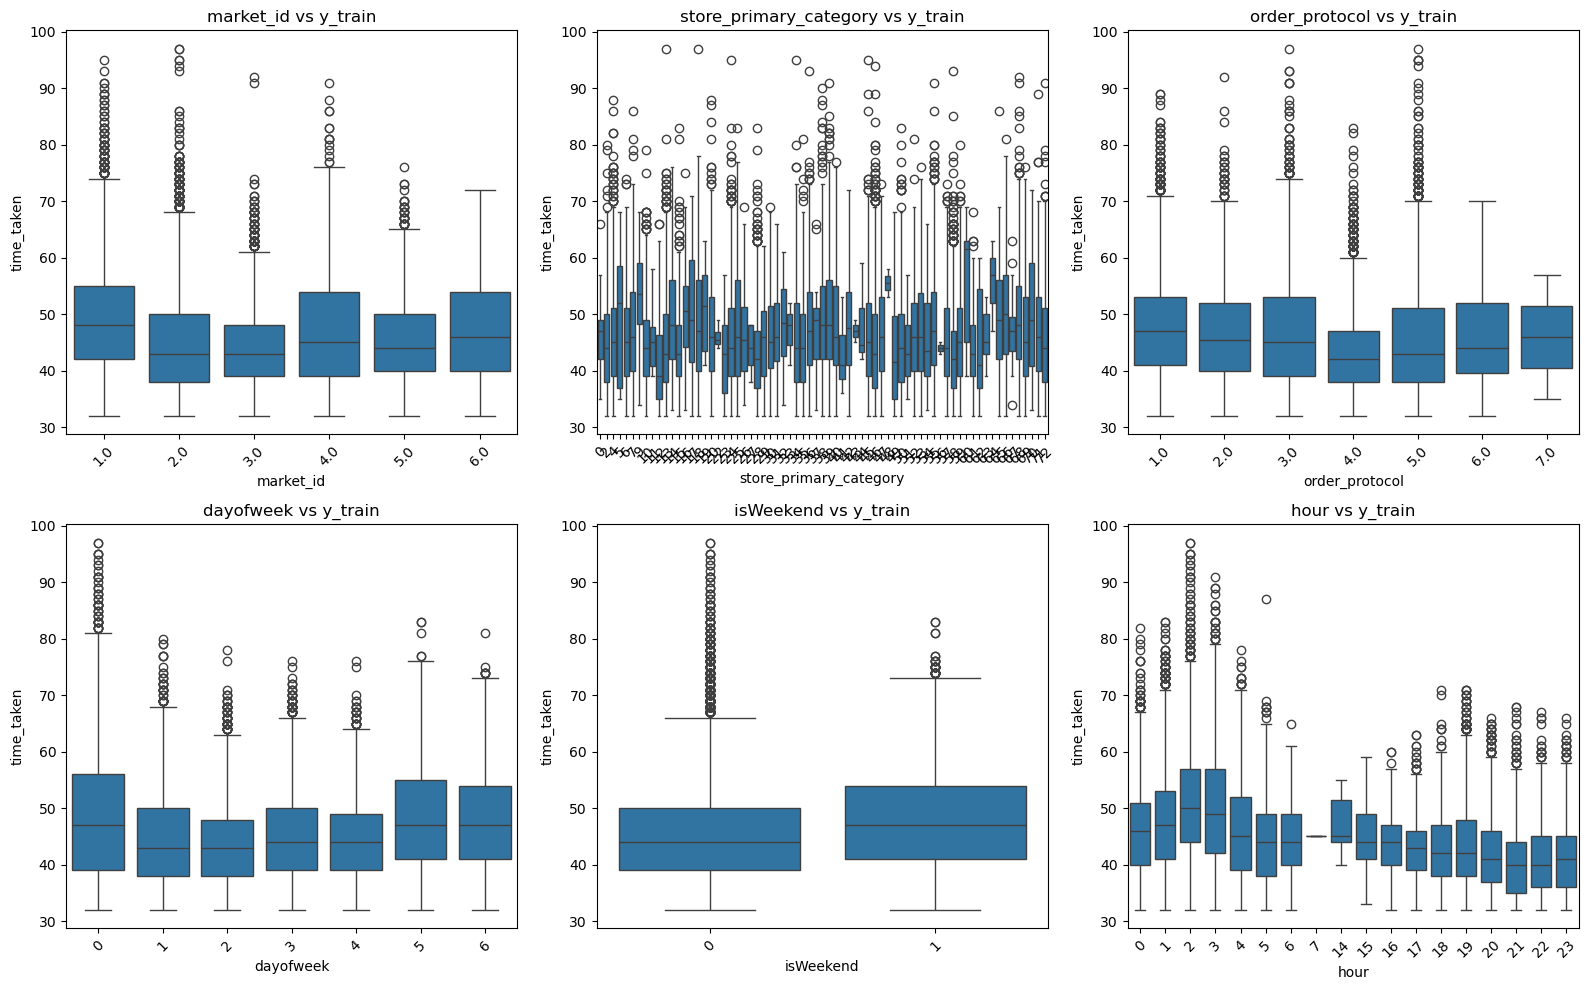

In [48]:
cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'dayofweek', 'isWeekend','hour']
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_test, x=col, y='time_taken')
    plt.title(f'{col} vs y_train')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

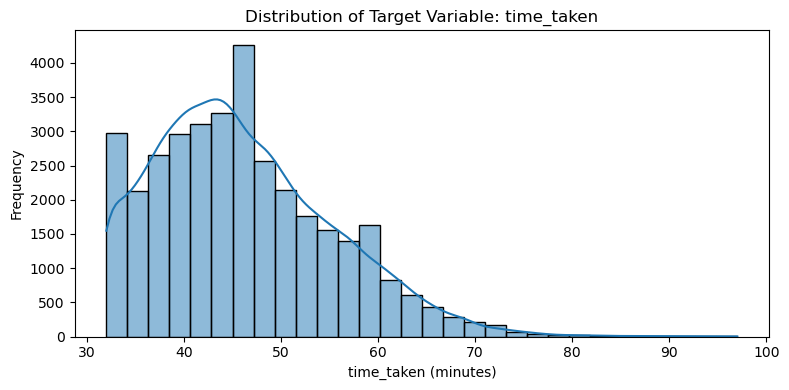

In [49]:
# Distribution of time_taken
plt.figure(figsize=(8, 4))
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of Target Variable: time_taken')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

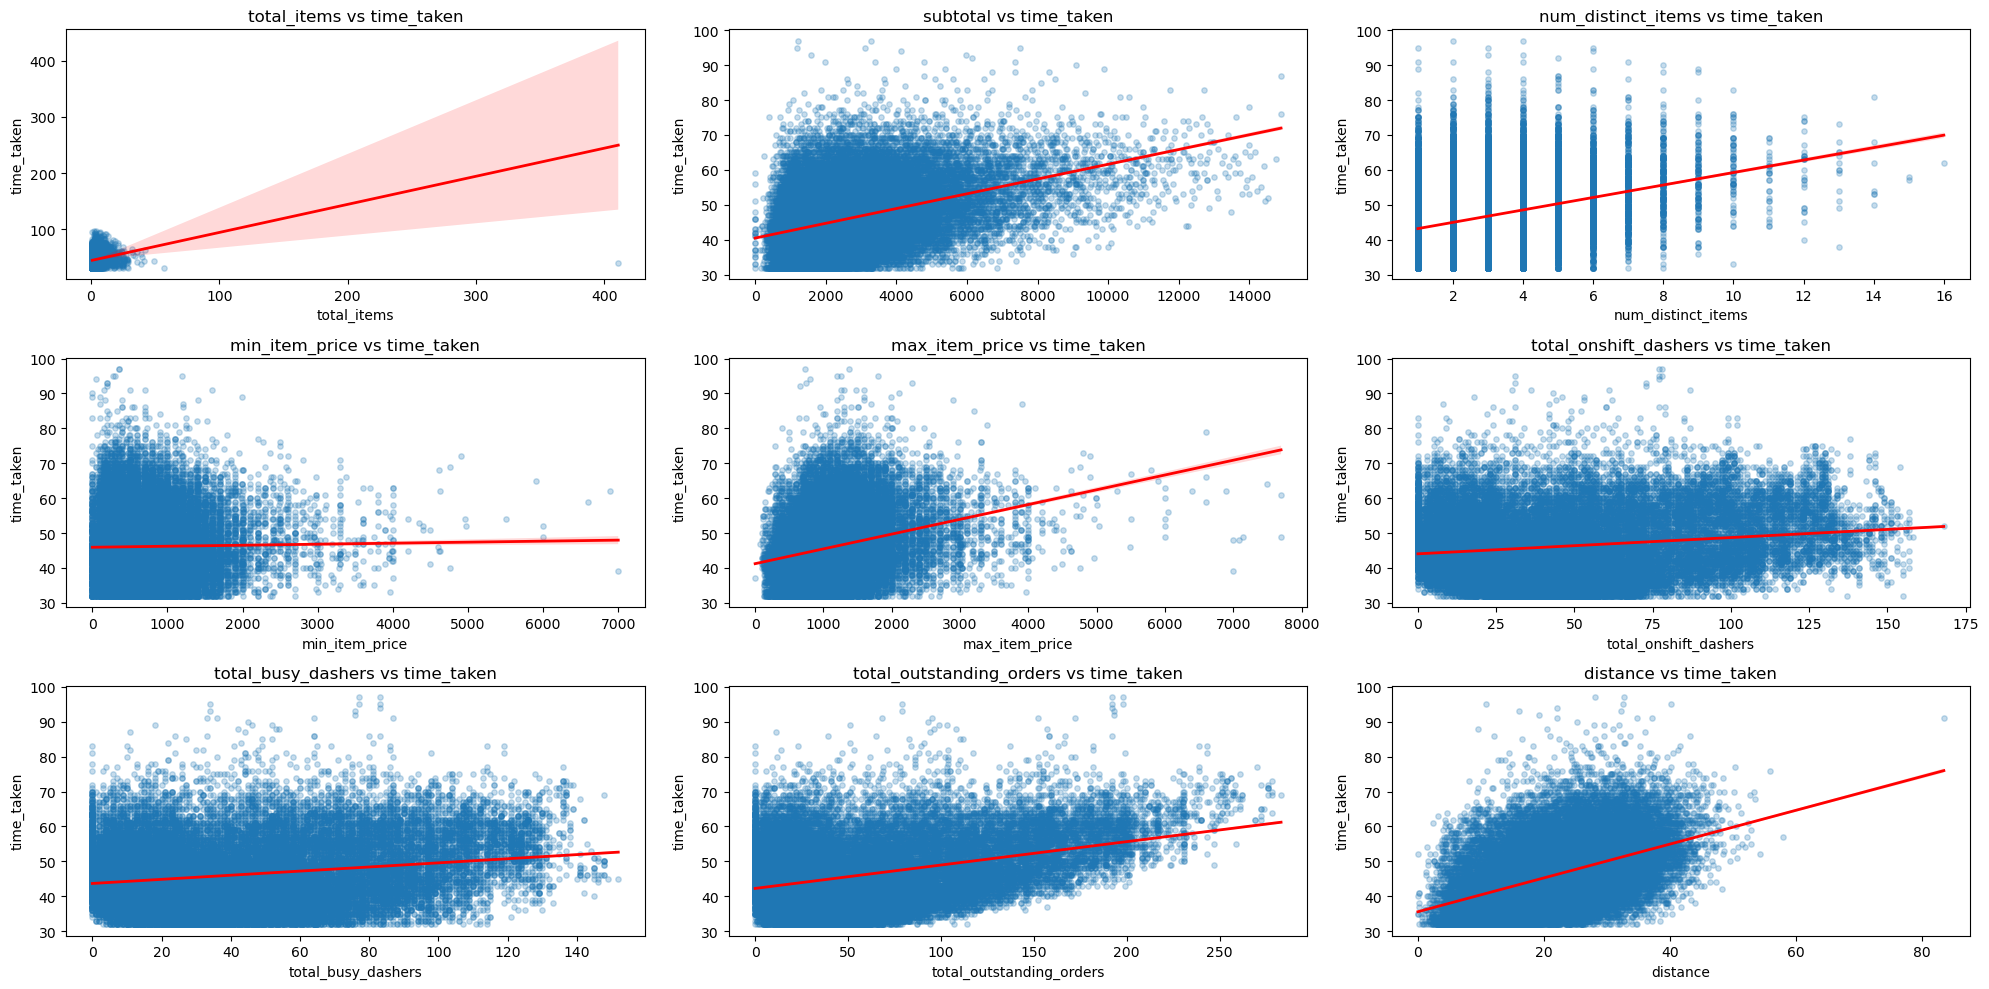

In [50]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_train[col],y = y_train)
    sns.regplot(x = X_test[col], y = y_test, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [51]:
# Drop the weakly correlated columns from training dataset

df_test = df_test.drop(columns=[
     'min_item_price',
    'store_primary_category',
     'dayofweek'
])

In [52]:
df_test.shape

(35138, 13)

In [53]:
def remove_outliers_using_caps(df, caps_dict):
    for col, bounds in caps_dict.items():
        df = df[(df[col] >= bounds['lower']) & (df[col] <= bounds['upper'])]
    return df

In [54]:
df_test = remove_outliers_using_caps(df_test, outlier_caps)
print("Test shape after removing outliers:", df_test.shape)


Test shape after removing outliers: (31580, 13)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

In [55]:
df_train.nunique()

market_id                      6
order_protocol                 7
total_items                   11
subtotal                    6375
num_distinct_items             8
max_item_price              2031
total_onshift_dashers        134
total_busy_dashers           123
total_outstanding_orders     215
distance                     937
hour                          19
isWeekend                      2
time_taken                    39
dtype: int64

In [56]:
columns_to_drop = [
 'store_primary_category', 
  'dayofweek'
]

df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

In [57]:
##  excluding store_primary_category since it has high cardinality, 
## excluding "dayofweek" as we have already introduced "isWeekend"

In [58]:
df_train

market_id order_protocol  total_items  subtotal  num_distinct_items  \
110609       4.0            3.0            6      2980                   3   
171156       3.0            3.0            2      3998                   2   
141352       2.0            5.0            1       699                   1   
37170        1.0            1.0            1       894                   1   
80311        2.0            3.0            5      2785                   4   
...          ...            ...          ...       ...                 ...   
119940       2.0            5.0            1      1098                   1   
103745       4.0            5.0            2      1250                   2   
132000       3.0            2.0            9      3650                   4   
146938       1.0            5.0            1      1195                   1   
122021       1.0            3.0            1       895                   1   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
110609             595                   49.0                49.0   
171156             999                   42.0                35.0   
141352             699                   86.0                82.0   
37170              695                   53.0                55.0   
80311              795                   44.0                34.0   
...                ...                    ...                 ...   
119940             999                   36.0                35.0   
103745             925                   71.0                98.0   
132000             625                   14.0                14.0   
146938             995                    3.0                 3.0   
122021             895                   23.0                23.0   

        total_outstanding_orders  distance  hour  isWeekend  time_taken  
110609                      87.0     23.12     2          0        58.0  
171156                      36.0     25.00     1          0        42.0  
141352                     106.0     14.92     1          1        37.0  
37170                       56.0     35.40     0          1        51.0  
80311                       40.0     25.04     1          0        41.0  
...                          ...       ...   ...        ...         ...  
119940                      37.0     23.72    20          0        33.0  
103745                      95.0     24.08     1          0        37.0  
132000                      14.0     20.24    22          1        44.0  
146938                       7.0      6.72     3          0        43.0  
122021                      37.0     10.56    20          1        41.0  

[125906 rows x 13 columns]

In [59]:

def encode_cyclic_hour(df, column='hour', max_val=24):
    df['sin_hour'] = np.sin(2 * np.pi * df[column] / max_val)
    df['cos_hour'] = np.cos(2 * np.pi * df[column] / max_val)
    return df

# Apply to both train and test
df_train = encode_cyclic_hour(df_train, column='hour')
df_test = encode_cyclic_hour(df_test, column='hour')


In [60]:
# Columns to encode
cols_to_encode = ['market_id', 'order_protocol']

# Combine train and test for consistent dummies
df_combined = pd.concat([df_train, df_test], keys=['train', 'test'])

# Create dummies
df_combined = pd.get_dummies(df_combined, columns=cols_to_encode, drop_first=True)

# Ensure dummy columns are integers (0/1 instead of True/False)
dummy_cols = [col for col in df_combined.columns if any(prefix in col for prefix in cols_to_encode)]
df_combined[dummy_cols] = df_combined[dummy_cols].astype(int)

# Split back to train and test
df_train = df_combined.xs('train')
df_test = df_combined.xs('test')


In [61]:
df_train

total_items  subtotal  num_distinct_items  max_item_price  \
110609            6      2980                   3             595   
171156            2      3998                   2             999   
141352            1       699                   1             699   
37170             1       894                   1             695   
80311             5      2785                   4             795   
...             ...       ...                 ...             ...   
119940            1      1098                   1             999   
103745            2      1250                   2             925   
132000            9      3650                   4             625   
146938            1      1195                   1             995   
122021            1       895                   1             895   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
110609                   49.0                49.0                      87.0   
171156                   42.0                35.0                      36.0   
141352                   86.0                82.0                     106.0   
37170                    53.0                55.0                      56.0   
80311                    44.0                34.0                      40.0   
...                       ...                 ...                       ...   
119940                   36.0                35.0                      37.0   
103745                   71.0                98.0                      95.0   
132000                   14.0                14.0                      14.0   
146938                    3.0                 3.0                       7.0   
122021                   23.0                23.0                      37.0   

        distance  hour  isWeekend  ...  market_id_3.0  market_id_4.0  \
110609     23.12     2          0  ...              0              1   
171156     25.00     1          0  ...              1              0   
141352     14.92     1          1  ...              0              0   
37170      35.40     0          1  ...              0              0   
80311      25.04     1          0  ...              0              0   
...          ...   ...        ...  ...            ...            ...   
119940     23.72    20          0  ...              0              0   
103745     24.08     1          0  ...              0              1   
132000     20.24    22          1  ...              1              0   
146938      6.72     3          0  ...              0              0   
122021     10.56    20          1  ...              0              0   

        market_id_5.0  market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
110609              0              0                   0                   1   
171156              0              0                   0                   1   
141352              0              0                   0                   0   
37170               0              0                   0                   0   
80311               0              0                   0                   1   
...               ...            ...                 ...                 ...   
119940              0              0                   0                   0   
103745              0              0                   0                   0   
132000              0              0                   1                   0   
146938              0              0                   0                   0   
122021              0              0                   0                   1   

        order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
110609                   0                   0                   0   
171156                   0                   0                   0   
141352                   0                   1                   0   
37170                    0                   0                   0   
80311                    0                   0        

#### **Import Necessary Libraries**

In [62]:
# Import libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [63]:
df_train

total_items  subtotal  num_distinct_items  max_item_price  \
110609            6      2980                   3             595   
171156            2      3998                   2             999   
141352            1       699                   1             699   
37170             1       894                   1             695   
80311             5      2785                   4             795   
...             ...       ...                 ...             ...   
119940            1      1098                   1             999   
103745            2      1250                   2             925   
132000            9      3650                   4             625   
146938            1      1195                   1             995   
122021            1       895                   1             895   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
110609                   49.0                49.0                      87.0   
171156                   42.0                35.0                      36.0   
141352                   86.0                82.0                     106.0   
37170                    53.0                55.0                      56.0   
80311                    44.0                34.0                      40.0   
...                       ...                 ...                       ...   
119940                   36.0                35.0                      37.0   
103745                   71.0                98.0                      95.0   
132000                   14.0                14.0                      14.0   
146938                    3.0                 3.0                       7.0   
122021                   23.0                23.0                      37.0   

        distance  hour  isWeekend  ...  market_id_3.0  market_id_4.0  \
110609     23.12     2          0  ...              0              1   
171156     25.00     1          0  ...              1              0   
141352     14.92     1          1  ...              0              0   
37170      35.40     0          1  ...              0              0   
80311      25.04     1          0  ...              0              0   
...          ...   ...        ...  ...            ...            ...   
119940     23.72    20          0  ...              0              0   
103745     24.08     1          0  ...              0              1   
132000     20.24    22          1  ...              1              0   
146938      6.72     3          0  ...              0              0   
122021     10.56    20          1  ...              0              0   

        market_id_5.0  market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
110609              0              0                   0                   1   
171156              0              0                   0                   1   
141352              0              0                   0                   0   
37170               0              0                   0                   0   
80311               0              0                   0                   1   
...               ...            ...                 ...                 ...   
119940              0              0                   0                   0   
103745              0              0                   0                   0   
132000              0              0                   1                   0   
146938              0              0                   0                   0   
122021              0              0                   0                   1   

        order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
110609                   0                   0                   0   
171156                   0                   0                   0   
141352                   0                   1                   0   
37170                    0                   0                   0   
80311                    0                   0        

In [64]:
## since we have introduced sine and cosine of hour,
## we will be dropping hour variable
df_train = df_train.drop(columns=['hour'])

In [65]:
y_train = df_train.pop('time_taken')
X_train = df_train

In [66]:
# Apply scaling to the numerical columns

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [67]:
## since we have introduced sine and cosine of hour,
## we will be dropping hour variable
df_test = df_test.drop(columns=['hour'])

In [68]:
y_test = df_test.pop('time_taken')
X_test = df_test

In [69]:
# Apply scaling to the numerical columns of test dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [70]:
# Create/Initialise the model
model = LinearRegression()


In [71]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [72]:
# Make predictions

# Predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Predictions on test data
y_test_pred = model.predict(X_test_scaled)

In [73]:
# Find results for evaluation metrics
# Training metrics
print("Training Metrics:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\nTest Metrics:")
# Test metrics
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


Training Metrics:
MAE: 2.00048047003916
MSE: 7.420442430167632
R²: 0.8967718008164958

Test Metrics:
MAE: 1.9897881802881403
MSE: 7.437706105473037
R²: 0.8956955959638616


In [74]:
X_train

total_items  subtotal  num_distinct_items  max_item_price  \
110609            6      2980                   3             595   
171156            2      3998                   2             999   
141352            1       699                   1             699   
37170             1       894                   1             695   
80311             5      2785                   4             795   
...             ...       ...                 ...             ...   
119940            1      1098                   1             999   
103745            2      1250                   2             925   
132000            9      3650                   4             625   
146938            1      1195                   1             995   
122021            1       895                   1             895   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
110609                   49.0                49.0                      87.0   
171156                   42.0                35.0                      36.0   
141352                   86.0                82.0                     106.0   
37170                    53.0                55.0                      56.0   
80311                    44.0                34.0                      40.0   
...                       ...                 ...                       ...   
119940                   36.0                35.0                      37.0   
103745                   71.0                98.0                      95.0   
132000                   14.0                14.0                      14.0   
146938                    3.0                 3.0                       7.0   
122021                   23.0                23.0                      37.0   

        distance  isWeekend  sin_hour  ...  market_id_3.0  market_id_4.0  \
110609     23.12          0  0.500000  ...              0              1   
171156     25.00          0  0.258819  ...              1              0   
141352     14.92          1  0.258819  ...              0              0   
37170      35.40          1  0.000000  ...              0              0   
80311      25.04          0  0.258819  ...              0              0   
...          ...        ...       ...  ...            ...            ...   
119940     23.72          0 -0.866025  ...              0              0   
103745     24.08          0  0.258819  ...              0              1   
132000     20.24          1 -0.500000  ...              1              0   
146938      6.72          0  0.707107  ...              0              0   
122021     10.56          1 -0.866025  ...              0              0   

        market_id_5.0  market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
110609              0              0                   0                   1   
171156              0              0                   0                   1   
141352              0              0                   0                   0   
37170               0              0                   0                   0   
80311               0              0                   0                   1   
...               ...            ...                 ...                 ...   
119940              0              0                   0                   0   
103745              0              0                   0                   0   
132000              0              0                   1                   0   
146938              0              0                   0                   0   
122021              0              0                   0                   1   

        order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
110609                   0                   0                   0   
171156                   0                   0                   0   
141352                   0                   1                   0   
37170                    0                   0                   0   
80311 

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [75]:
# Loop through the number of features and test the model

rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# 4. Get selected features
selected_features = X_train_scaled.columns[rfe.support_]
print("Top 8 Selected Features:", list(selected_features))

Top 8 Selected Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'sin_hour', 'market_id_2.0', 'market_id_4.0']


In [76]:
# Build the final model with selected number of features

# Use only selected features
X_train_selected = X_train_scaled[selected_features]

# Fit final model
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Coefficients
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': final_model.coef_
})
print(coef_df)


                    Feature  Coefficient
0                  subtotal    16.208667
1     total_onshift_dashers   -47.243426
2        total_busy_dashers   -15.267597
3  total_outstanding_orders    75.216120
4                  distance    18.030151
5                  sin_hour     4.223295
6             market_id_2.0    -3.245319
7             market_id_4.0    -2.301556


In [77]:
y_train_pred = final_model.predict(X_train_selected)

In [78]:
# Make sure df_test_encoded has same selected features
X_test_selected = X_test_scaled[selected_features]

# Predict
y_test_pred = final_model.predict(X_test_selected)

In [79]:
# Training metrics
print("Training Metrics:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

# Test metrics
print("\nTest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

Training Metrics:
MAE: 2.4552201735510377
MSE: 10.465058740011948
R²: 0.8544171485396699

Test Metrics:
MAE: 2.451229005426327
MSE: 10.522281635352892
R²: 0.8524383325299347


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

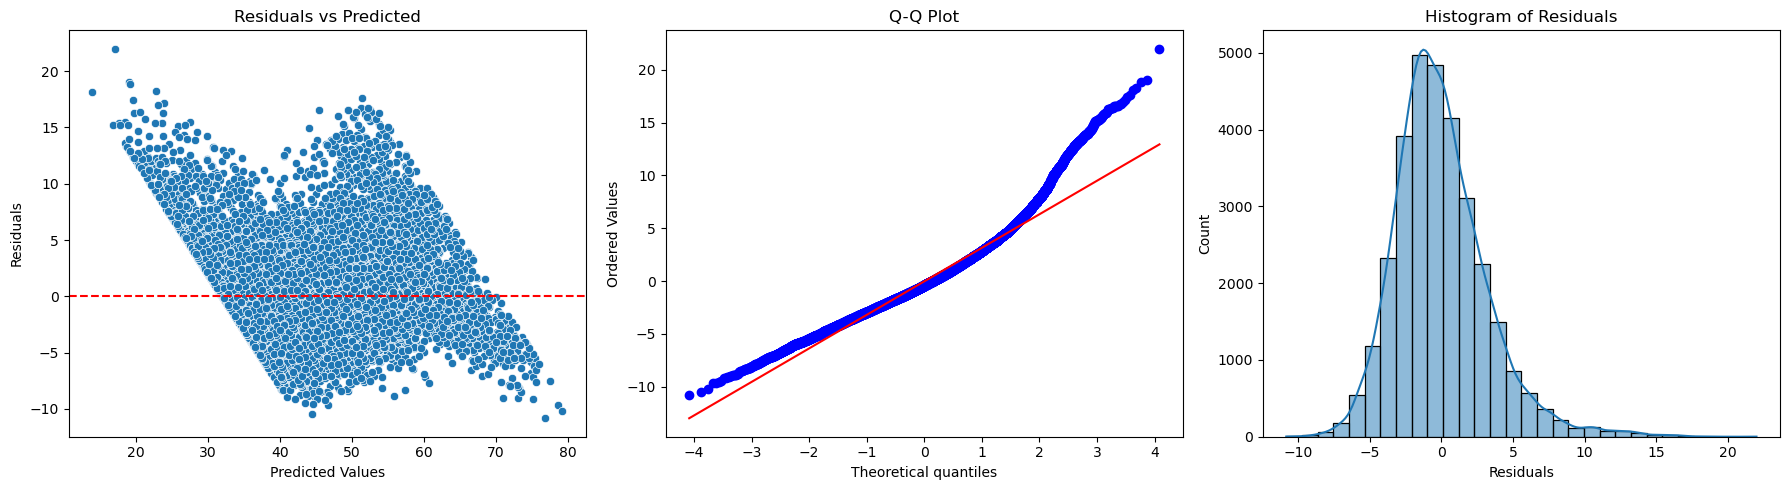

In [80]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_test_pred

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Predicted values
sns.scatterplot(x=y_test_pred, y=residuals, ax=axs[0])
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_title("Residuals vs Predicted")
axs[0].set_xlabel("Predicted Values")
axs[0].set_ylabel("Residuals")

# 2. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot")

# 3. Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axs[2], bins=30)
axs[2].set_title("Histogram of Residuals")
axs[2].set_xlabel("Residuals")

plt.tight_layout()
plt.show()



[Your inferences here:]

Residual vs Predicted plot - Residuals show a funnel shape instead of random scatter, indicating heteroscedasticity and possible non-linearity. The model may be missing key patterns and violates linear regression assumptions.

Q-Q Plot - Model errors are not normally distributed, which can impact confidence intervals and hypothesis tests. This can be critical if you’re doing inference, not just prediction.

Residual Histogram - Residuals are not perfectly normal; some skewness exists. While this may be tolerable in large samples, it supports the earlier finding of non-normal residuals



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [81]:
# Compare the scaled vs unscaled features used in the final model

scaled_coefs = final_model.coef_

# Get only min and max for selected features
min_vals_selected = scaler.data_min_[rfe.support_]
max_vals_selected = scaler.data_max_[rfe.support_]
range_vals_selected = max_vals_selected - min_vals_selected

# unscale
unscaled_coefs = scaled_coefs / range_vals_selected
unscaled_intercept = final_model.intercept_ - np.sum((min_vals_selected * scaled_coefs) / range_vals_selected)

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Scaled Coefficient': scaled_coefs,
    'Unscaled Coefficient': unscaled_coefs,
    'Min': min_vals_selected,
    'Max': max_vals_selected
}).sort_values(by='Unscaled Coefficient', key=abs, ascending=False)


print("Unscaled Intercept:", unscaled_intercept)
coef_df

Unscaled Intercept: 32.84780231368531


Feature  Scaled Coefficient  Unscaled Coefficient     Min  \
6             market_id_2.0           -3.245319             -3.245319    0.00   
7             market_id_4.0           -2.301556             -2.301556    0.00   
5                  sin_hour            4.223295              2.111648   -1.00   
4                  distance           18.030151              0.481575    4.44   
1     total_onshift_dashers          -47.243426             -0.355214    0.00   
3  total_outstanding_orders           75.216120              0.351477    0.00   
2        total_busy_dashers          -15.267597             -0.125144    0.00   
0                  subtotal           16.208667              0.001811  538.00   

       Max  
6     1.00  
7     1.00  
5     1.00  
4    41.88  
1   133.00  
3   214.00  
2   122.00  
0  9490.00

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [82]:
# Analyze the effect of a unit change in a feature, say 'distance'

# Keeping all other variables constant, a one-unit increase in the `distance` feature leads to an approximate increase of 0.48 minutes
# in predicted delivery time. This unscaled coefficient indicates a direct, positive relationship between distance and delivery time, 
# highlighting that even small increases in distance can meaningfully delay delivery when other factors like order volume or
# dasher availability remain unchanged.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

The dataset includes categorical variables like market_id, store_primary_category, order_protocol, isWeekend, hour, and dayofweek, with the latter three derived via feature engineering. While order_protocol, isWeekend, and possibly market_id impact delivery time, none were among the top 8 predictors in the final model.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

test_size=0.2 means 20% of the data is reserved for testing, while 80% is used for training the model during the train-test split.

---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Among all the features, distance has the highest correlation with the target variable time_taken, with a correlation coefficient of 0.46

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
I used the quantile-based method to identify outliers. Specifically, I defined the lower and upper bounds for each feature based on the 1st percentile (0.01) and 99th percentile (0.99) values. Any data points lying outside this range were considered outliers.
>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the scaled coefficients, the top 3 features significantly affecting delivery time are:

1. total_outstanding_orders (+75.22): An increase in pending orders strongly raises delivery time, highlighting operational load.
2. total_onshift_dashers (−47.24): More available dashers significantly lower delivery time, boosting efficiency.
3. distance (+18.03): Longer delivery distances lead to higher delivery time, showing a direct impact of distance on delays.

>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

Linear Regression is a supervised learning algorithm used to model the relationship between a dependent variable and one or more independent variables. It fits a straight line (in simple linear regression) that minimizes the difference between actual and predicted values using the least squares method. The model outputs coefficients that represent the impact of each feature on the target. It's easy to interpret, assumes linearity, and is sensitive to outliers and multicollinearity in the data.

>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression involves one independent variable and one dependent variable, modeling their relationship with a straight line. It fits the form Y = β₀ + β₁X + ε, where β₀ is the intercept and β₁ is the slope. In contrast, Multiple Linear Regression uses two or more independent variables to predict a single dependent variable, extending the equation to Y = β₀ + β₁X₁ + β₂X₂ + ... + βnXn + ε for capturing more complex relationships.

>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function in linear regression measures how far the predicted values are from the actual values, typically using Mean Squared Error. It guides the model in finding the best-fitting line. Minimization of this function, often through gradient descent or the normal equation, helps determine the optimal model coefficients that reduce prediction error and improve accuracy.

---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Overfitting happens when a model learns both the patterns and the noise in the training data, performing well on training but poorly on new data. Underfitting occurs when the model is too simple to capture the underlying patterns, leading to poor performance on both training and test data. The goal is to find a balance where the model generalizes well.

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residual plots help diagnose a linear regression model by showing the difference between actual and predicted values. A random scatter around zero suggests a good fit. Patterns like curves indicate non-linearity, and a funnel shape suggests heteroscedasticity (non-constant variance). Outliers or clusters may reveal violations of assumptions or missing variables

>